This Script collects the json files assosicated with each frame and cocacenates it to one json file of all frames in the form of a coco dataset. 

Remark: Detr expects the follwoing file structure
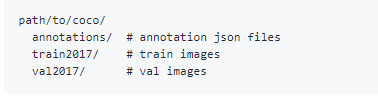

Therfor the created json file has to be copied to annotations with the following file names: 

-val2017.json
-train2017.json

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import torch
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
import json
import glob

#Path to the folder with the json files, which you want to combine to one dataset. This hast to be done seperaterly
#For the training and testing dataset. 

In [5]:
path = 'C:\OneDrive\EPFL 5. Semester\ML\evaluate_models\coco\val2017'
all_files = glob.glob(path + "/*.json")

In [6]:
#load the relevant data (imagePath, shapes) into a pandas dataframe 
li = []
for filename in all_files:
    with open(filename) as f:
        data_dict = json.load(f)
    data = {'imagePath': data_dict["imagePath"],'points': [data_dict["shapes"][0]["points"]]}
    df = pd.DataFrame.from_dict(data)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

ValueError: No objects to concatenate

Now i am transofrming the data that it has the same form as a coco dataset. check out this website for the structure https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch/#coco-dataset-format

In [24]:
#All the informations that are constant
info = {
    "description": "drone dataset",
    "url": "",
    "version": "1.0",
    "year": 2020,
    "contributor": "Silvio Müller",
    "date_created": "2020/11/16"
}
licenses =[
    {
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License"
    }]
categories = [{"id": 1, "name": "drone", "supercategory": "drone",}]

In [25]:
#building images
const = {"width": 720, "height": 540, "license": 1, "flicker_url": "", "coco_url": "", "date_captured": "2020-12-01 00:00:01"}
images = []
for idx,row in frame.iterrows():
    images.append({**{"file_name":row[0],"id": idx,},**const})

In [26]:
#building annotations
const = {"category_id": 1, "segmentation": [], "area": 0, "iscrowd": 0,}
annotations = []
for idx,row in frame.iterrows():
    annotations.append({**{"id": idx, "image_id": idx,"bbox": [row[1][0][0],row[1][0][1],row[1][1][0]-row[1][0][0],row[1][1][1]-row[1][0][1]]},**const})

In [27]:
#Combining the whole dataset 
coco_dataset = {  
        "info": info, 
        "images": images, 
        "annotations": annotations, 
        "licenses": licenses,
        "categories": categories,
        }


In [28]:
#Writing the whole dataset to the same folder as the pictures/json files were located
with open('{}/instances_val2017.json'.format(path), 'w', encoding='utf-8') as f:
    json.dump(coco_dataset, f, ensure_ascii=False, indent=4)